In [ ]:
import yfinance as yahooFinance
import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
start = "2004-02-01"
end = '2024-09-08'

In [ ]:
VGT = yahooFinance.download('VGT', start=start, end=end)['Adj Close']
SPX = yahooFinance.download('^SPX', start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
returns_VGT = VGT.pct_change().dropna()
returns_SPX = SPX.pct_change().dropna()

In [ ]:
print(returns_VGT.isnull().sum())  # Count NaNs
print(np.isinf(returns_VGT).sum())  # Count infinite values

0
0


In [ ]:
returns_VGT_standardized = (returns_VGT - returns_VGT.mean()) / returns_VGT.std()

In [ ]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.9/982.9 kB 10.6 MB/s eta 0:00:00


In [ ]:
from arch import arch_model

In [ ]:
returns_VGT_rescaled = returns_VGT * 100

In [ ]:
model= arch_model(returns_VGT_rescaled, vol='APARCH', p=1, q=3, dist='skewt')
result = model.fit(disp='off')

                         Constant Mean - Power ARCH Model Results                        
Dep. Variable:                         Adj Close   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            Power ARCH   Log-Likelihood:               -8124.00
Distribution:      Standardized Skew Student's t   AIC:                           16266.0
Method:                       Maximum Likelihood   BIC:                           16325.0
                                                   No. Observations:                 5184
Date:                           Wed, Oct 09 2024   Df Residuals:                     5183
Time:                                   13:43:05   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
----------------------------------------

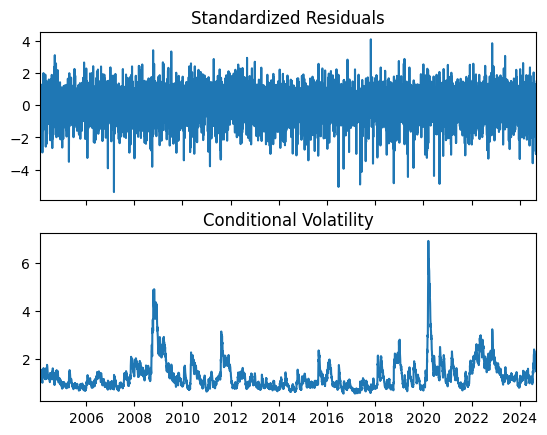

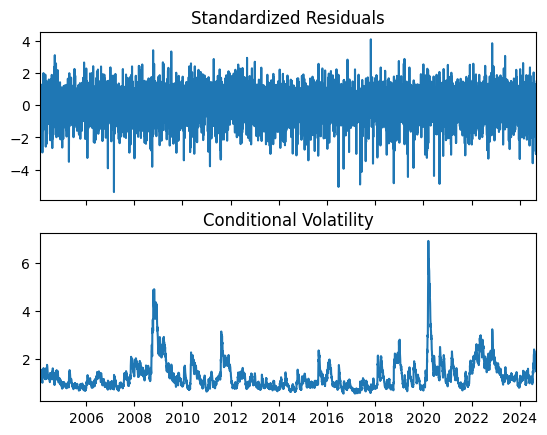

In [ ]:
print(result.summary())
result.plot()